In [183]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
import random

# for upset plots
from itertools import combinations, chain
from upsetplot import from_memberships
from math import comb
import upsetplot


# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [245]:

# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
# out_path = '/Volumes/Data/Emily/figures/fig_3_sc/python_out/'
out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/python_out/'

In [ ]:

#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
    omc_countN = pickle.load(f)

In [5]:
# initial processing
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df) for df in omc_clean]

In [6]:

# seperate it cells
omc_it = [df[df['type']=="IT"] for df in omc_type]

# seperate pt cells
omc_pt = [df[df['type']=="PT"] for df in omc_type]

In [240]:
# seperate and concatenate by species
steg_it = []
steg_pt = []
mmus_it = []
mmus_pt = []

for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"]=="STeg":
        steg_it.append(omc_it[i])
        steg_pt.append(omc_pt[i])
    elif metadata.loc[i,"species"]=="MMus":
        mmus_it.append(omc_it[i])
        mmus_pt.append(omc_pt[i])

st_it_all = pd.concat(steg_it)
st_pt_all = pd.concat(steg_pt)
mm_it_all = pd.concat(mmus_it)
mm_pt_all = pd.concat(mmus_pt)

## IT cells

## AMY NOT in IT

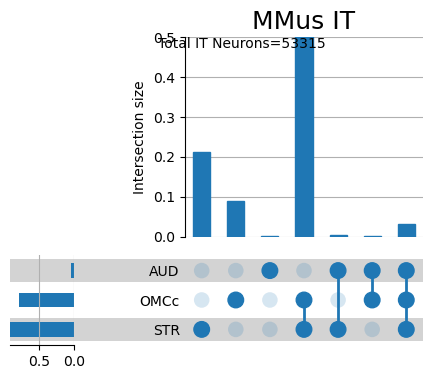

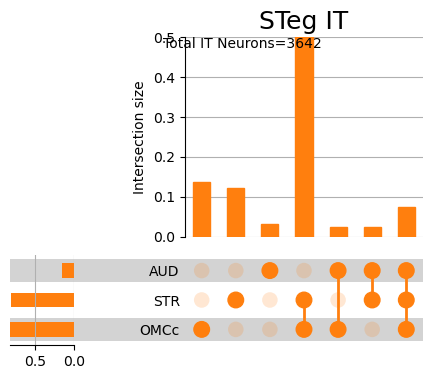

In [10]:
plot_areas = ["OMCc", "AUD", "STR"]


# plot mmus
mm_it = []
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"] == "MMus":
        mm_it.append(omc_it[i])

mm_it_all = pd.concat(mm_it)

plot = df_to_motif_proportion(mm_it_all, areas=plot_areas, proportion=True)
upset_plot(plot, title="MMus IT", suptitle="Total IT Neurons="+str(mm_it_all.shape[0]))
# plt.suptitle("Total PAG Neurons="+str(mm_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
plt.show()

# plot STeg
st_it = []
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"] == "STeg":
        st_it.append(omc_it[i])

st_it_all = pd.concat(st_it)

plot = df_to_motif_proportion(st_it_all, areas=plot_areas, proportion=True)
upset_plot(plot, title="STeg IT", suptitle="Total IT Neurons="+str(st_it_all.shape[0]), facecolor="tab:orange")
# plt.suptitle("Total PAG Neurons="+str(mm_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
plt.show()



## IT + AMY


In [ ]:
# initial processing
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df, it_areas=["OMCc", "AUD", "AMY", "STR"], 
                             pt_areas=["HY", "SNr", "SCm", "PG", "PAG", "BS"]) for df in omc_clean]


# seperate it cells
omc_it = [df[df['type']=="IT"] for df in omc_type]
omc_pt = [df[df['type']=="PT"] for df in omc_type]

print("Mouse","\t", "Amy IT cells", "\t", "AMY IT %",
      "\t\t", "Amy PT cells", "\t", "AMY PT %")

for i in range(num_samples):
    amy_it = omc_it[i].sum()["AMY"]
    amy_pt = omc_pt[i].sum()["AMY"]
    print(metadata.loc[i,"mice"], "\t", amy_it, "\t\t", amy_it/omc_it[0].shape[0]*100,
          "\t", amy_pt, "\t\t", amy_pt/omc_pt[0].shape[0]*100)

Mouse 	 Amy IT cells 	 AMY IT % 		 Amy PT cells 	 AMY PT %
MMM1 	 3.0 		 0.03618817852834741 	 101.0 		 7.709923664122137
MMF2 	 70.0 		 0.8443908323281062 	 20.0 		 1.5267175572519083
MMF3 	 43.0 		 0.5186972255729795 	 7.0 		 0.5343511450381679
STM1 	 21.0 		 0.25331724969843183 	 8.0 		 0.6106870229007634
STM2 	 5.0 		 0.060313630880579006 	 1.0 		 0.07633587786259542
STF3 	 2.0 		 0.024125452352231604 	 0.0 		 0.0
MMM4 	 324.0 		 3.90832328106152 	 159.0 		 12.137404580152673
MMF5 	 6.0 		 0.07237635705669482 	 1.0 		 0.07633587786259542
STF4 	 45.0 		 0.5428226779252111 	 65.0 		 4.961832061068702
STM5 	 1.0 		 0.012062726176115802 	 0.0 		 0.0
STF6 	 79.0 		 0.9529553679131484 	 48.0 		 3.6641221374045805
STM7 	 44.0 		 0.5307599517490953 	 120.0 		 9.16030534351145


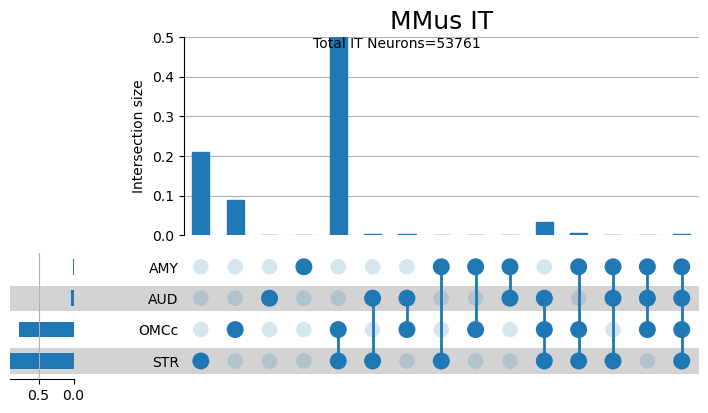

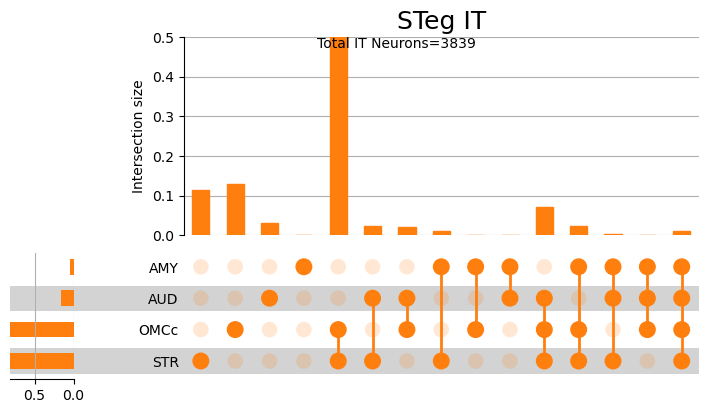

In [ ]:
plot_areas = ["OMCc", "AUD", "AMY", "STR"]


# plot mmus
mm_it = []
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"] == "MMus":
        mm_it.append(omc_it[i])

mm_it_all = pd.concat(mm_it)

plot = df_to_motif_proportion(mm_it_all, areas=plot_areas, proportion=True)
upset_plot(plot, title="MMus IT", suptitle="Total IT Neurons="+str(mm_it_all.shape[0]))
# plt.suptitle("Total PAG Neurons="+str(mm_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
plt.show()

# plot STeg
st_it = []
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"] == "STeg":
        st_it.append(omc_it[i])

st_it_all = pd.concat(st_it)

plot = df_to_motif_proportion(st_it_all, areas=plot_areas, proportion=True)
upset_plot(plot, title="STeg IT", suptitle="Total IT Neurons="+str(st_it_all.shape[0]), facecolor="tab:orange")
# plt.suptitle("Total PAG Neurons="+str(mm_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
plt.show()



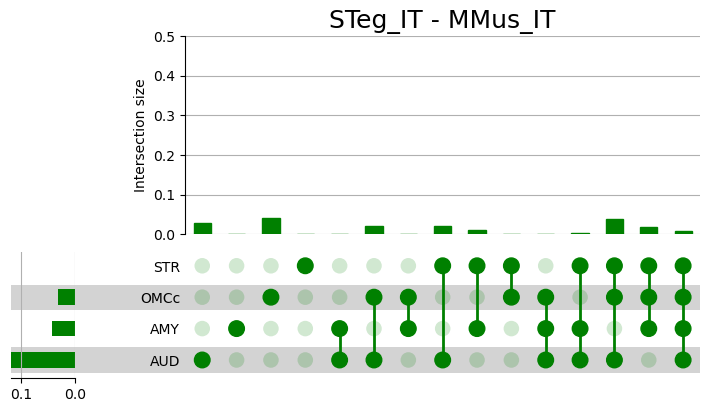

In [ ]:
# plot differences in motifs b/w species
mm_motif_prop = df_to_motif_proportion(mm_it_all, areas=plot_areas, proportion=True)
st_motif_prop = df_to_motif_proportion(st_it_all, areas=plot_areas, proportion=True)

plot = st_motif_prop-mm_motif_prop
upset_plot(plot, title="STeg_IT - MMus_IT", facecolor="green")


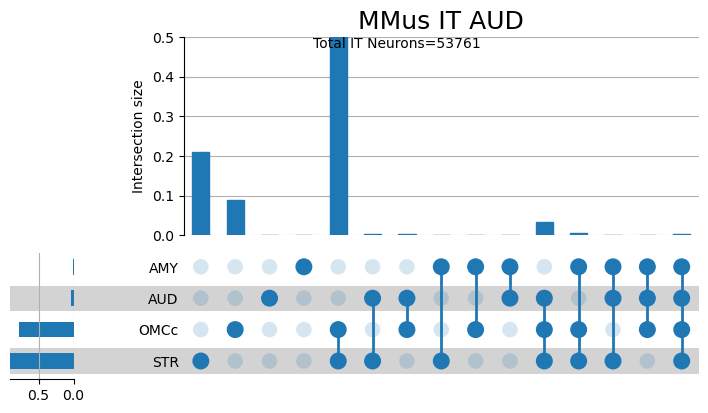

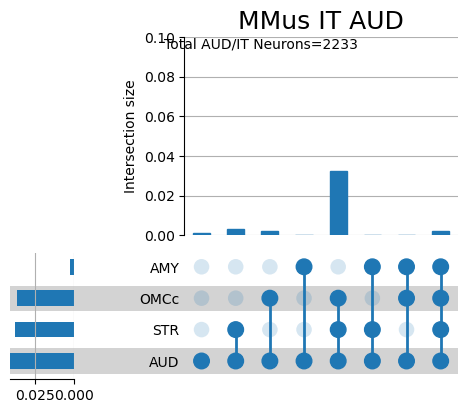

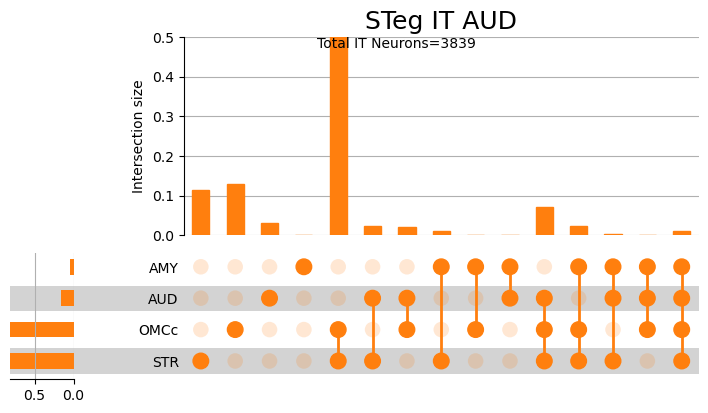

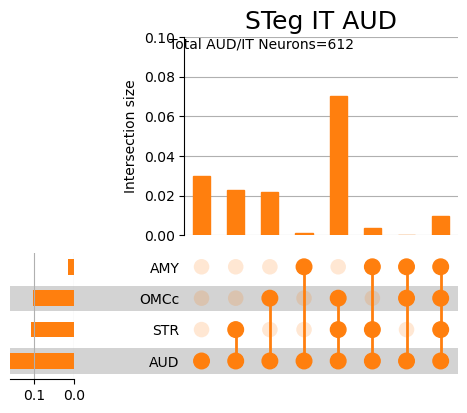

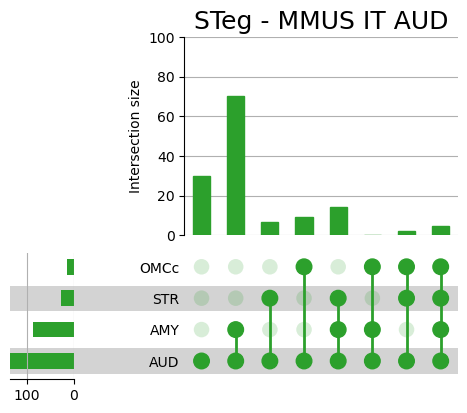

In [ ]:
# plot motifs w/ AUD
mm_motif_prop = df_to_motif_proportion(mm_it_all, areas=plot_areas, proportion=True)
test = mm_motif_prop.index
idx = []
for i in range(test.shape[0]):
    if test[i][1] == True:
        idx.append(i)
mm_motif_prop[idx]

upset_plot(mm_motif_prop, title="MMus IT AUD", suptitle="Total IT Neurons="+str(mm_it_all.shape[0]))
plt.show()

upset_plot(mm_motif_prop[idx], title="MMus IT AUD", suptitle="Total AUD/IT Neurons="+str(int(mm_it_all.sum()["AUD"])),
           ymax=0.1)
plt.show()


# STeg
st_motif_prop = df_to_motif_proportion(st_it_all, areas=plot_areas, proportion=True)

# only keep motifs w/ aud
idx=[]
for i in range(test.shape[0]):
    if st_motif_prop.index[i][1] == True:
        idx.append(i)

upset_plot(st_motif_prop, title="STeg IT AUD", facecolor="tab:orange", suptitle="Total IT Neurons="+str(st_it_all.shape[0]))
plt.show()

upset_plot(st_motif_prop[idx], title="STeg IT AUD", suptitle="Total AUD/IT Neurons="+str(int(st_it_all.sum()["AUD"]))
           , facecolor="tab:orange", ymax=0.1)


plt.show()


sub = st_motif_prop/mm_motif_prop
idx=[]
for i in range(test.shape[0]):
    if sub.index[i][1] == True:
        idx.append(i)

upset_plot(sub[idx], title="STeg/MMUS IT AUD", facecolor="tab:green", ymin=0, ymax=100)
plt.show()


In [ ]:
print(st_motif_prop)
print(mm_motif_prop)
print(st_motif_prop/mm_motif_prop)

AMY    AUD    OMCc   STR  
False  False  True   False    0.129982
       True   False  False    0.029695
True   False  False  False    0.001302
False  False  False  True     0.114874
       True   True   False    0.021881
True   False  True   False    0.000260
False  False  True   True     0.559000
True   True   False  False    0.001302
False  True   False  True     0.022923
True   False  False  True     0.011461
       True   True   False    0.000000
False  True   True   True     0.070331
True   False  True   True     0.023704
       True   False  True     0.003386
              True   True     0.009898
dtype: float64
AMY    AUD    OMCc   STR  
False  False  True   False    0.088614
       True   False  False    0.000986
True   False  False  False    0.000074
False  False  False  True     0.211064
       True   True   False    0.002362
True   False  True   False    0.000019
False  False  True   True     0.653001
True   True   False  False    0.000019
False  True   False  True     0.00

# PT cells

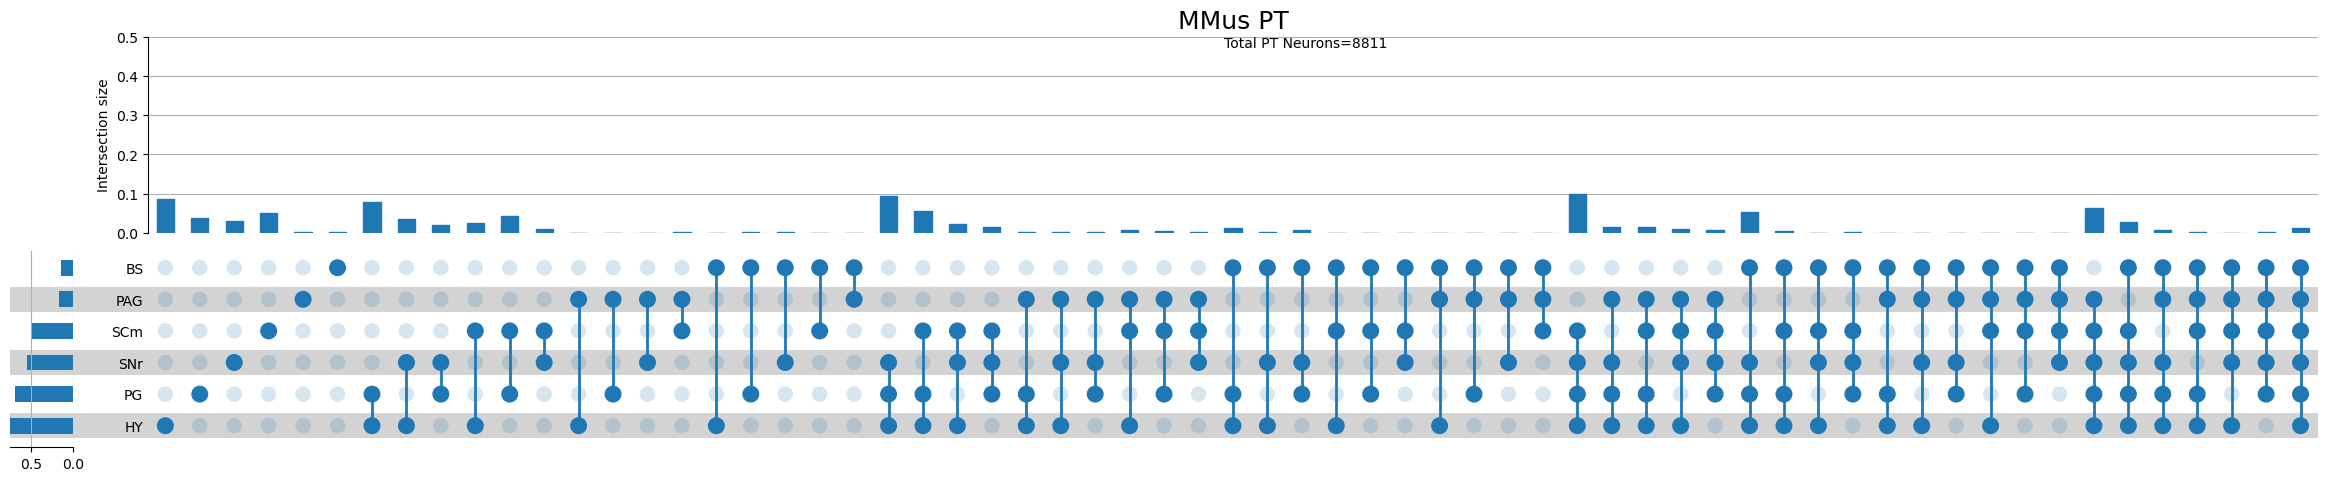

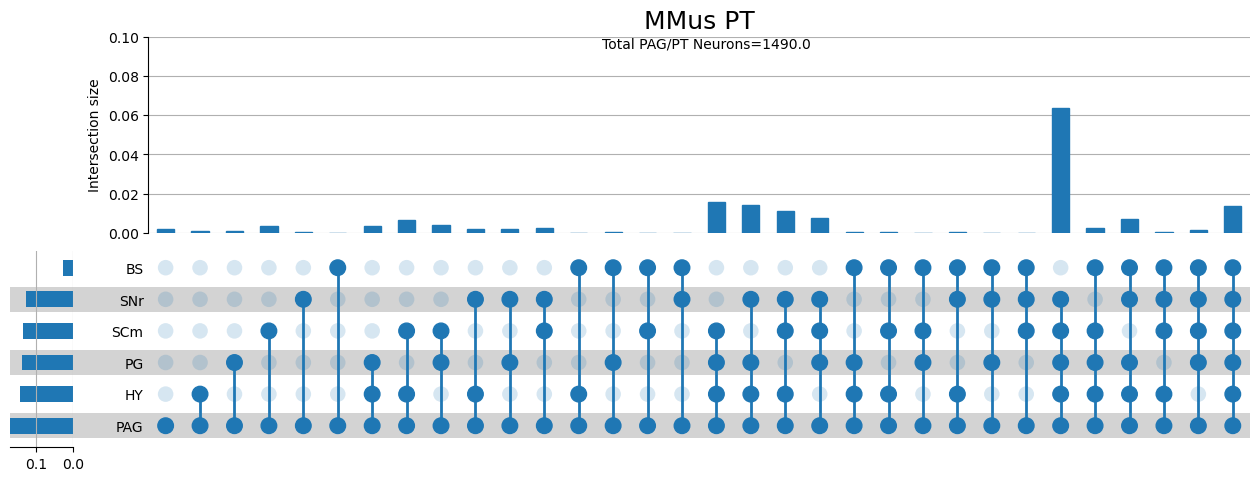

In [ ]:
plot_areas = ["BS", "SNr", "SCm", "PG", "HY", "PAG"]

# plot mmus
mm_pt = []
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"] == "MMus":
        mm_pt.append(omc_pt[i])

mm_pt_all = pd.concat(mm_pt)

mm_pt_motif_prop = df_to_motif_proportion(mm_pt_all, areas=plot_areas, proportion=True)

mm_pag_idx = []
for i in range(mm_pt_motif_prop.shape[0]):
    if mm_pt_motif_prop.index[i][2] == True:
        mm_pag_idx.append(i)


upset_plot(mm_pt_motif_prop, title="MMus PT", suptitle="Total PT Neurons="+str(mm_pt_all.shape[0]))
# plt.suptitle("Total PAG Neurons="+str(mm_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
plt.show()

upset_plot(mm_pt_motif_prop[mm_pag_idx], title="MMus PT", suptitle="Total PAG/PT Neurons="+str(mm_pt_all.sum()['PAG']),
           ymax=0.1)
# plt.suptitle("Total PAG Neurons="+str(mm_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
plt.show()

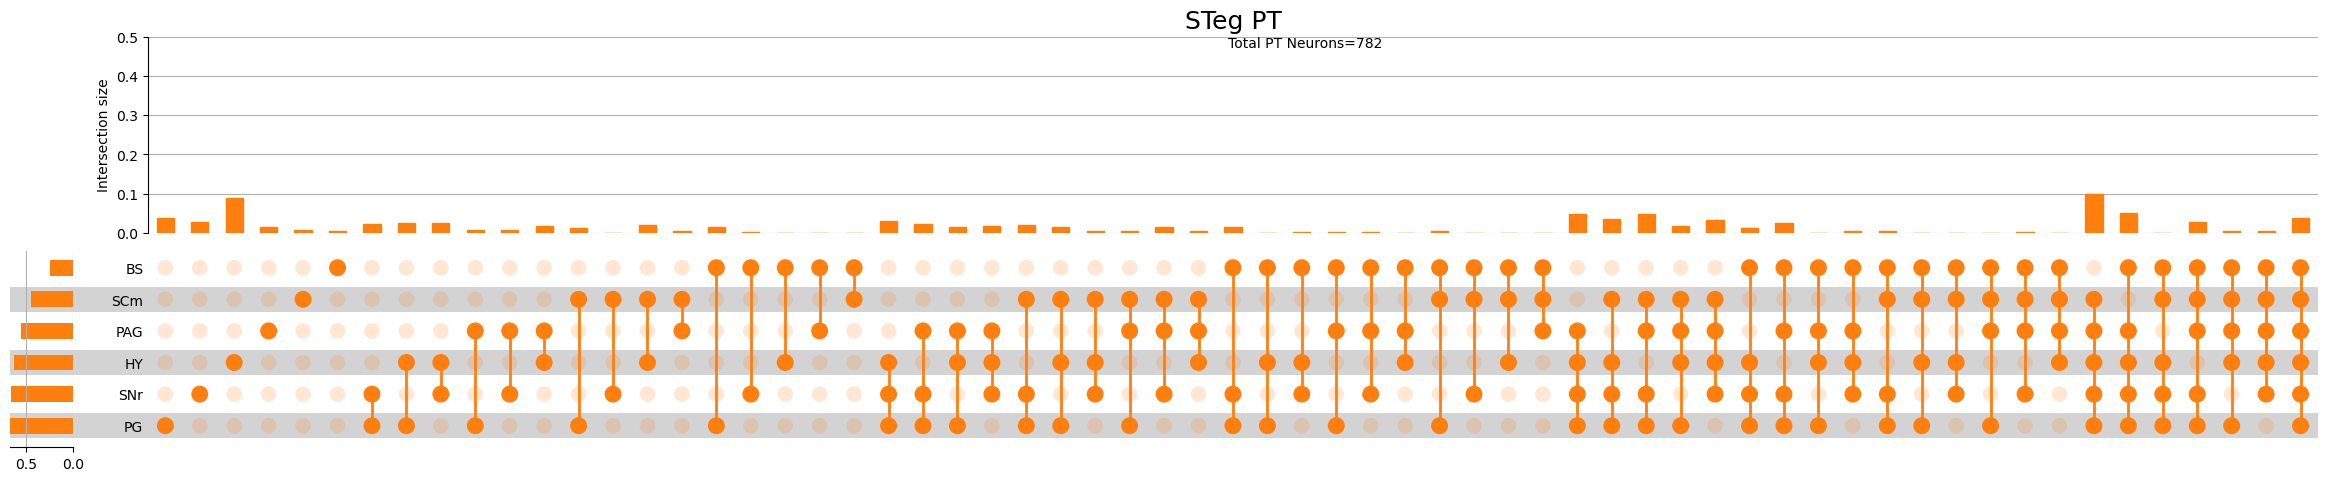

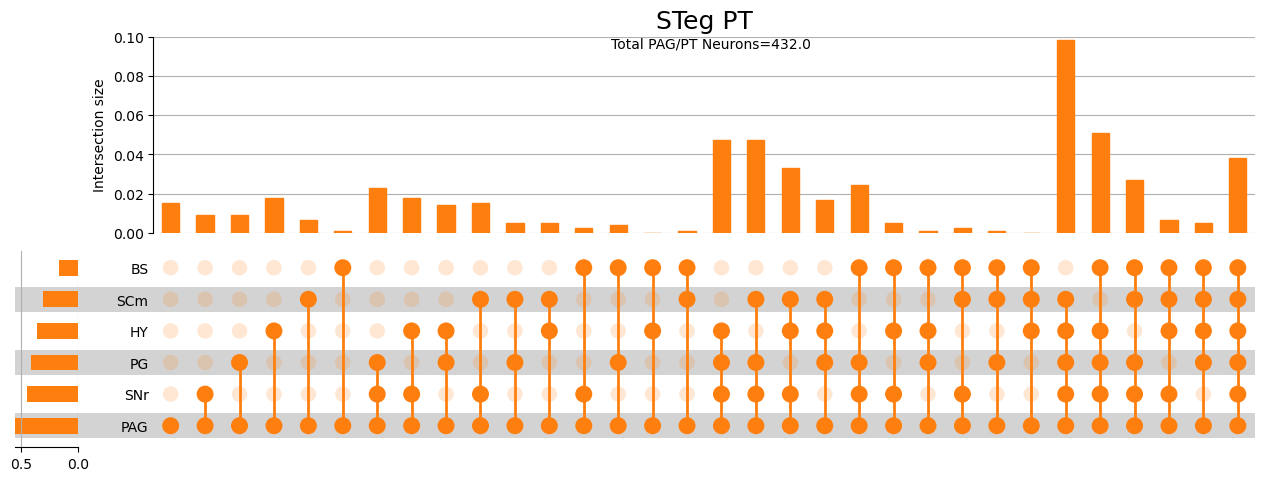

In [ ]:
plot_areas = ["BS", "SNr", "SCm", "PG", "HY", "PAG"]

# plot steg
st_pt = []
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"] == "STeg":
        st_pt.append(omc_pt[i])

st_pt_all = pd.concat(st_pt)

st_pt_motif_prop = df_to_motif_proportion(st_pt_all, areas=plot_areas, proportion=True)

st_pag_idx = []
for i in range(st_pt_motif_prop.shape[0]):
    if st_pt_motif_prop.index[i][2] == True:
        st_pag_idx.append(i)


upset_plot(st_pt_motif_prop, title="STeg PT", suptitle="Total PT Neurons="+str(st_pt_all.shape[0]),
           facecolor="tab:orange")
# plt.suptitle("Total PAG Neurons="+str(mm_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
plt.show()

upset_plot(st_pt_motif_prop[st_pag_idx], title="STeg PT", suptitle="Total PAG/PT Neurons="+str(st_pt_all.sum()['PAG']),
           ymax=0.1, facecolor="tab:orange")
# plt.suptitle("Total PAG Neurons="+str(st_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
plt.show()

# Check for significantly over/under-represented motifs

In [ ]:
# shuffle rows

# calculate motif proportions

# make histogram

# plot in graph

## IT cells - no AMY

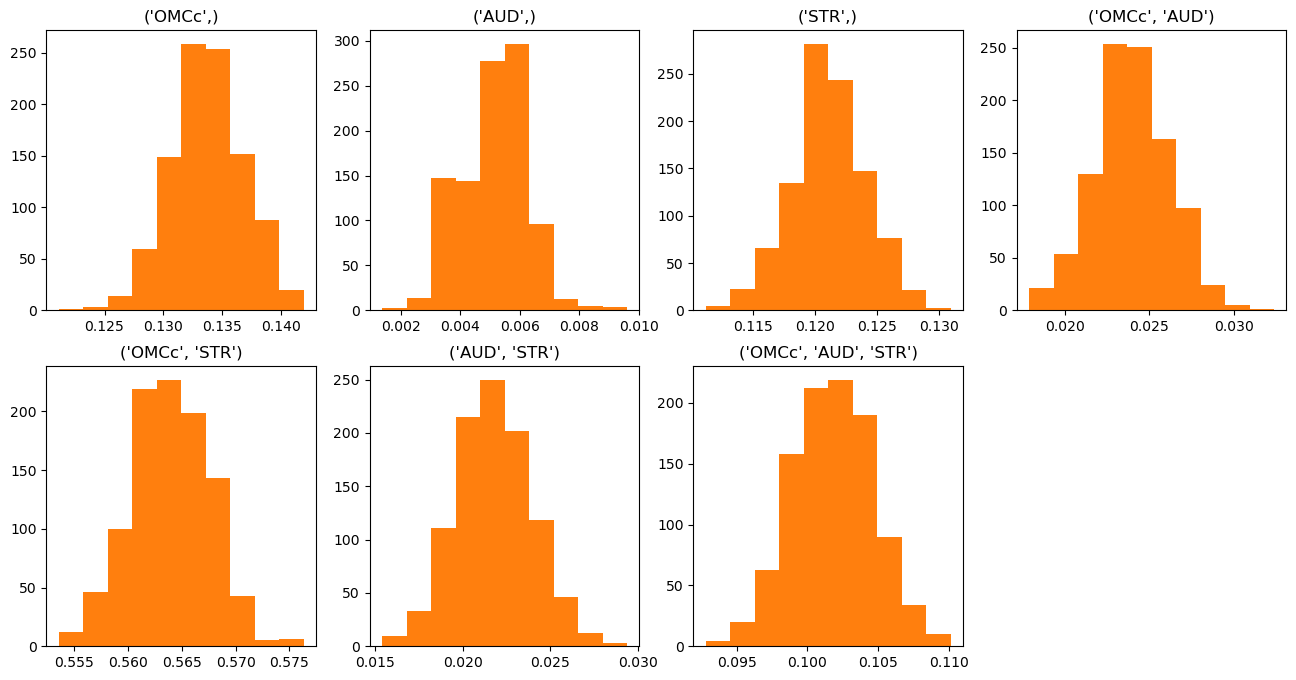

In [65]:
# Motif permutation test - MMus
plot_it = ["OMCc", "AUD", "STR"]
reps = 1000

# 1. random shuffle w/in columns to break dependence
# 2. calculate freq of each motif
# 3. repeat 1/2 for 100+ times
shuffle_prop_reps = []
for n in range(reps):
    shuffle = st_it_all.apply(lambda x: x.sample(frac=1).values)
    comb_prop = df_to_motif_proportion(shuffle, areas=plot_it, proportion=True)
    shuffle_prop_reps.append(comb_prop)

# 4. Plot histogram of simulations per area

area_comb = []
for i in range(len(plot_it)):
    n = i+1
    area_comb.append(list(combinations(plot_it, n)))
area_comb_list = list(chain.from_iterable(area_comb)) # flatten list


simulations = np.array(shuffle_prop_reps)



fig, axs = plt.subplots(2,4, figsize=(16,8))
i=0
for ax in axs.flat:
    if i < 7:
        ax.hist(simulations[:,i], color="tab:orange")
        ax.set_title(area_comb_list[i])
    else:
        ax.axis('off')
    i+=1

plt.savefig(out_path+"st_it_permutation_rep"+str(reps)+".jpg", dpi=300, bbox_inches="tight")
plt.show()


In [68]:
motifs, simulation = motif_simulation(st_it_all, plot_areas=plot_it, reps=500)


simulation_stats = pd.DataFrame(columns=["motif", "reps", "mean", "std", "ci95"])

for rep in range(25,225,25):
    motifs, simulation = motif_simulation(st_it_all, plot_areas=plot_it, reps=rep)
    means = simulation.mean(axis=0)
    stds = simulation.std(axis=0)
    ci95s = (1.96*stds / math.sqrt(rep))

    int = pd.DataFrame({"motif":motifs, "reps":rep, "mean":means, "std":stds, "ci95":ci95s})

    simulation_stats = pd.concat([simulation_stats, int])

simulation_stats


,motif,reps,mean,std,ci95
0,"(OMCc,)",25,0.134278,0.003683,0.001444
1,"(AUD,)",25,0.005250,0.000897,0.000352
2,"(STR,)",25,0.121439,0.003037,0.001191
3,"(OMCc, AUD)",25,0.024031,0.002052,0.000804
4,"(OMCc, STR)",25,0.563800,0.003909,0.001532
5,"(AUD, STR)",25,0.022043,0.002246,0.000880
6,"(OMCc, AUD, STR)",25,0.101340,0.002764,0.001084
0,"(OMCc,)",50,0.133751,0.003328,0.000923
1,"(AUD,)",50,0.004898,0.000975,0.000270
2,"(STR,)",50,0.121439,0.002618,0.000726


In [169]:
test = df_to_motif_proportion(st_it_all, plot_it, proportion=False)
test

AUD    OMCc   STR  
False  True   False     499
True   False  False     114
False  False  True      441
True   True   False      84
False  True   True     2146
True   False  True       88
       True   True      270
dtype: int64

In [218]:


# generate proportions for motifs (counts encounter problems in figure size???)
motif_prop = df_to_motif_proportion(st_it_all, plot_it, proportion=True)
# generate motif counts
motif_counts =df_to_motif_proportion(st_it_all, plot_it, proportion=False)


test = motif_prop.index.names
narea = test.index("AUD")
idx = [i for i, x in enumerate(motif_prop.index) if x[narea]]
motif_prop[idx]

(4,)

TypeError: list indices must be integers or slices, not list

In [215]:
motif_prop[idx]

AUD   OMCc   STR  
True  False  False    0.031301
      True   False    0.023064
      False  True     0.024163
      True   True     0.074135
dtype: float64

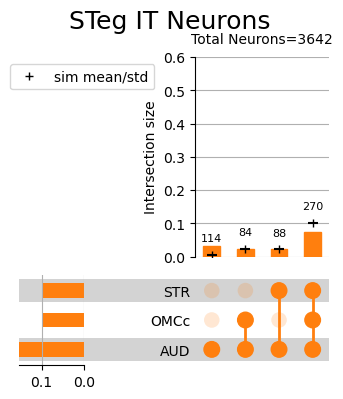

In [230]:
motifs, simulation = motif_simulation(st_it_all, plot_areas=plot_it, reps=500)


# 5. plot motif means in upset plot

# generate proportions for motifs (counts encounter problems in figure size???)
motif_prop = df_to_motif_proportion(st_it_all, plot_it, proportion=True)
# generate motif counts
motif_counts =df_to_motif_proportion(st_it_all, plot_it, proportion=False)

# if subset specified, extract motifs that project to area specified
subset="AUD"
if subset:
    motif_areas = motif_prop.index.names
    subset_idx = motif_areas.index(subset)
    idx = [i for i, x in enumerate(motif_prop.index) if x[subset_idx]]
else:
    idx = range(motif_prop.shape[0])


# generate mean/std from permuted data
means = simulations.mean(axis=0)
mean_mems = from_memberships(motifs, data=means)
x = list(range(len(idx)))
y = means
yerr = simulations.std(axis=0)


upset_plot(motif_prop[idx],  facecolor="tab:orange", ymax=0.6)
# upsetplot.add_catplot(kind="point", y)
plt.scatter(x,y[idx], color="black", marker="_", s=50, zorder=10)
plt.errorbar(x, y[idx], 
            yerr=yerr[idx], fmt='|', color="black", zorder=11)

# label counts for each motif
for i in x:
    plt.text(x=i, y=means[idx][i]+0.04, s=str(motif_counts[idx][i]), ha="center", fontsize=8, zorder=12)

legend = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="sim mean/std")
plt.legend(handles=[legend], bbox_to_anchor=(-0.25, 1))
plt.title("Total Neurons="+str(st_it_all.shape[0]), pad=10, fontsize=10)
plt.suptitle("STeg IT Neurons", y=1, fontsize=18)
plt.show()

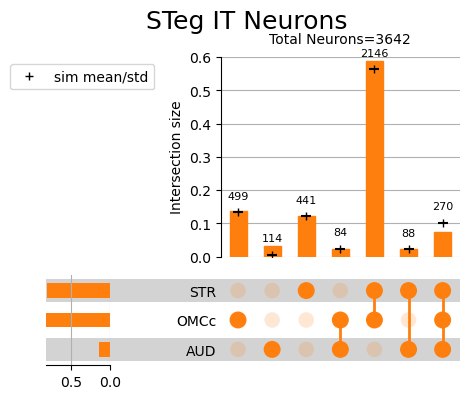

In [194]:
motifs, simulation = motif_simulation(st_it_all, plot_areas=plot_it, reps=500)


# 5. plot motif means in upset plot

# generate proportions for motifs (counts encounter problems in figure size???)
motif_prop = df_to_motif_proportion(st_it_all, plot_it, proportion=True)
# generate motif counts
motif_counts =df_to_motif_proportion(st_it_all, plot_it, proportion=False)

# generate mean/std from permuted data
means = simulations.mean(axis=0)
mean_mems = from_memberships(motifs, data=means)
x = list(range(len(motifs)))
y = means
yerr = simulations.std(axis=0)


upset_plot(motif_prop,  facecolor="tab:orange", ymax=0.6)
# upsetplot.add_catplot(kind="point", y)
plt.scatter(x,y, color="black", marker="_", s=50, zorder=10)
plt.errorbar(x, y, 
            yerr=yerr, fmt='|', color="black", zorder=11)

# label counts for each motif
for i in x:
    plt.text(x=i, y=means[i]+0.04, s=str(motif_counts[i]), ha="center", fontsize=8, zorder=12)

legend = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="sim mean/std")
plt.legend(handles=[legend], bbox_to_anchor=(-0.25, 1))
plt.title("Total Neurons="+str(st_it_all.shape[0]), pad=10, fontsize=10)
plt.suptitle("STeg IT Neurons", y=1, fontsize=18)
plt.show()

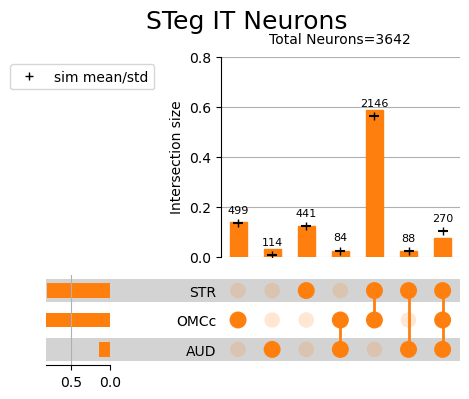

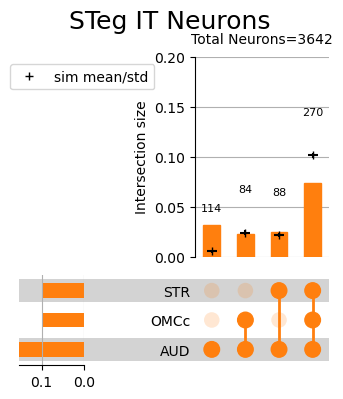

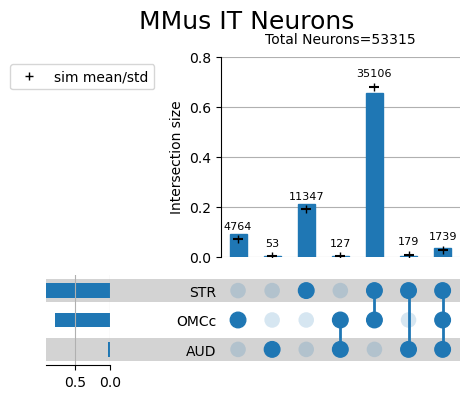

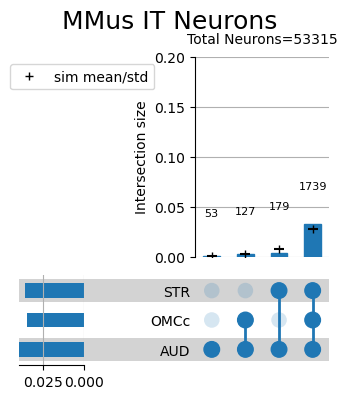

In [251]:
plot_it = ["OMCc", "AUD", "STR"]

# plot steg
fancy_upsetplot(st_it_all, plot_it, reps=500, title="STeg IT Neurons", ymax=0.8)
plt.savefig(out_path+"st_it_upset.jpg", dpi=300)
plt.show()


fancy_upsetplot(st_it_all, plot_it, reps=500, subset="AUD", title="STeg IT Neurons", ymax=0.2)
plt.show()

# plot mmus
fancy_upsetplot(mm_it_all, plot_it, reps=250, color="tab:blue", title="MMus IT Neurons", ymax=0.8)
plt.savefig(out_path+"mm_it_upset.jpg", dpi=300, bbox_inches="tight")
plt.show()

fancy_upsetplot(mm_it_all, plot_it, reps=250, subset="AUD", color="tab:blue", title="MMus IT Neurons", ymax=0.2)
plt.show()


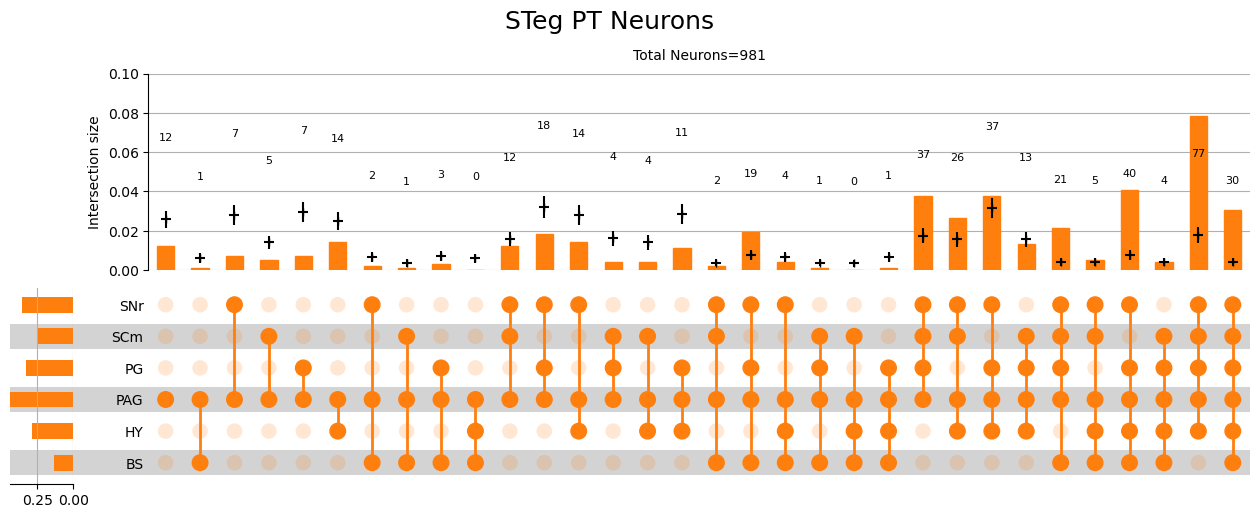

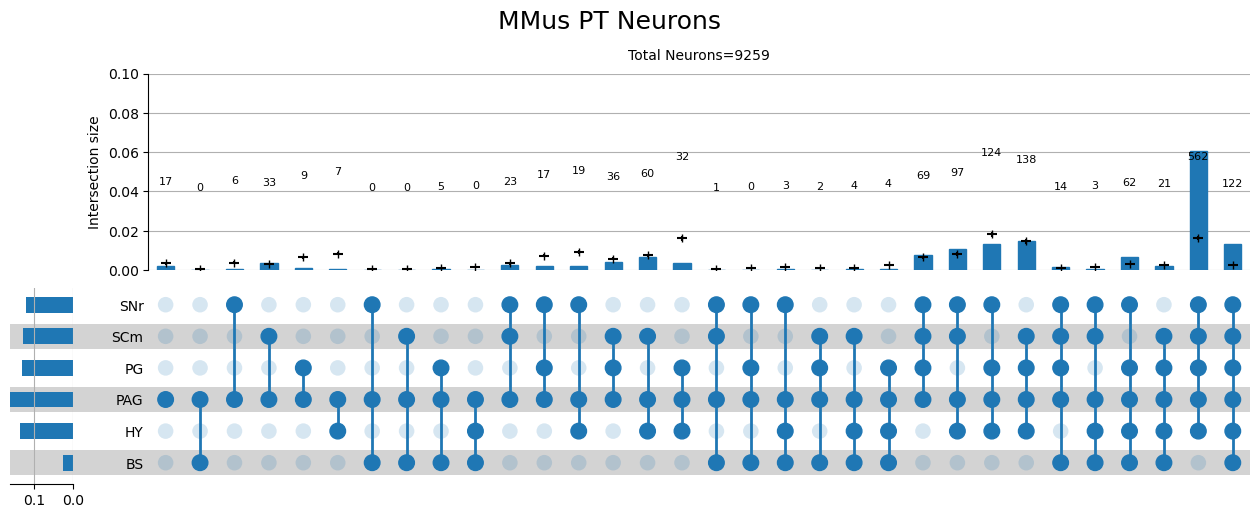

In [252]:
plot_pt = ["BS", "SNr", "SCm", "PG", "HY", "PAG"]


# plot steg
# fancy_upsetplot(st_pt_all, plot_pt, reps=250, title="STeg PT Neurons", ymax=0.1, plot_legend=False)
# plt.show()

fancy_upsetplot(st_pt_all, plot_pt, reps=250, subset="PAG", title="STeg PT Neurons", ymax=0.1, plot_legend=False)
plt.savefig(out_path+"st_pt_upset.jpg", dpi=300, bbox_inches="tight")
plt.show()

# plot mmus
# fancy_upsetplot(mm_pt_all, plot_pt, reps=250, color="tab:blue", title="MMus PT Neurons", ymax=0.1, plot_legend=False)
# plt.show()

fancy_upsetplot(mm_pt_all, plot_pt, reps=250, subset="PAG", color="tab:blue", title="MMus PT Neurons", ymax=0.1, plot_legend=False)
plt.savefig(out_path+"mm_pt_upset.jpg", dpi=300, bbox_inches="tight")
plt.show()



# testing scatter

[0.00309153 0.00112634 0.00299582 0.00220807 0.00362606 0.00212735
 0.00286293]


/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_39040/3942924056.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(motifs_labels, minor=False, rotation=90)


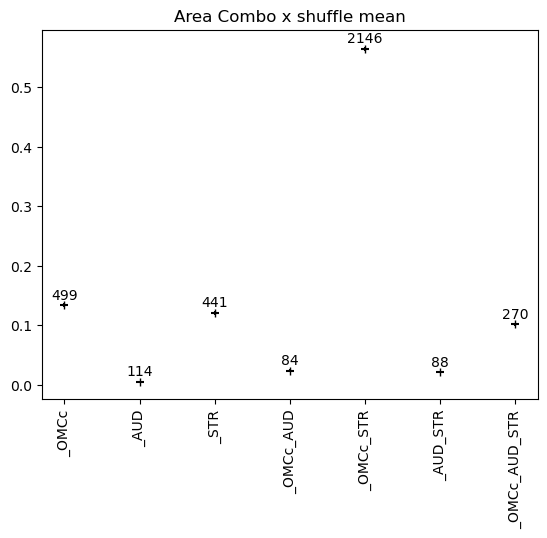

In [172]:
means = simulations.mean(axis=0)
mean_mems = from_memberships(motifs, data=means)
x = list(range(len(motifs)))
y = means
yerr = simulations.std(axis=0)
print(yerr)

# generate proportions for motifs (counts encounter problems in figure size???)
motif_prop = df_to_motif_proportion(st_it_all, plot_it, proportion=True)
# generate motif counts
motif_counts =df_to_motif_proportion(st_it_all, plot_it, proportion=False)


fig, ax = plt.subplots(1,1)

# plot simulated mean
ax.scatter(x,y, color="black", marker="_")
# plot simulated std
ax.errorbar(x, y, 
            yerr=yerr, fmt='|', color="black")
for i in x:
    ax.text(x=i, y=means[i]+0.01, s=str(motif_counts[i]), ha="center")
ax.set_title("Area Combo x shuffle mean")
ax.set_xticklabels(motifs_labels, minor=False, rotation=90)

plt.show()